<a href="https://colab.research.google.com/github/jpantojaj/DIP-CS_AI/blob/main/First_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos Librerias y Datos

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cr_loan = pd.read_excel('cr_loan.xlsx',sheet_name='cr_loan')
cr_loan

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Exploramos la data

In [ ]:
cr_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
cr_loan.shape

(32581, 12)

In [ ]:
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


##Empecemos a explorar los datos

In [ ]:
cr_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
cr_loan.describe(exclude='number')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


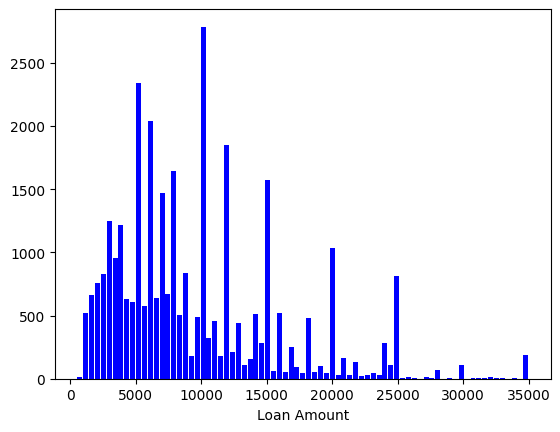

In [ ]:
# Histograma de Montos
plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue', rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

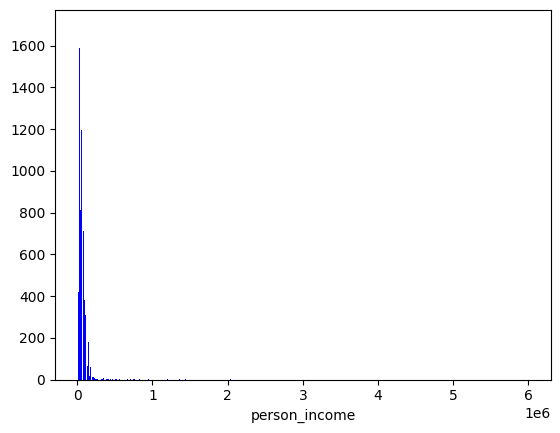

In [ ]:
# Histograma de Ingresos
plt.hist(x=cr_loan['person_income'], bins='auto', color='blue', rwidth=0.85)
plt.xlabel("person_income")
plt.show()

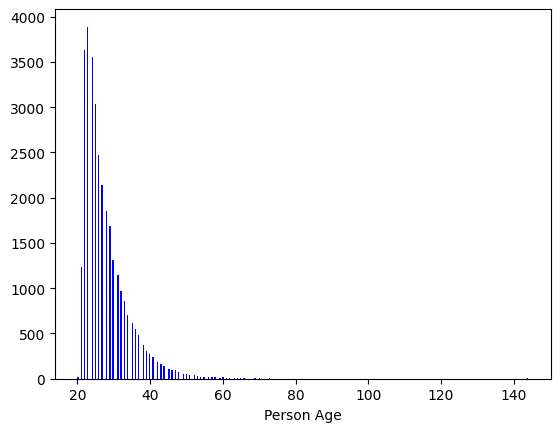

In [ ]:
# Histograma de Edad
plt.hist(x=cr_loan['person_age'], bins='auto', color='blue', rwidth=0.85)
plt.xlabel("Person Age")
plt.show()

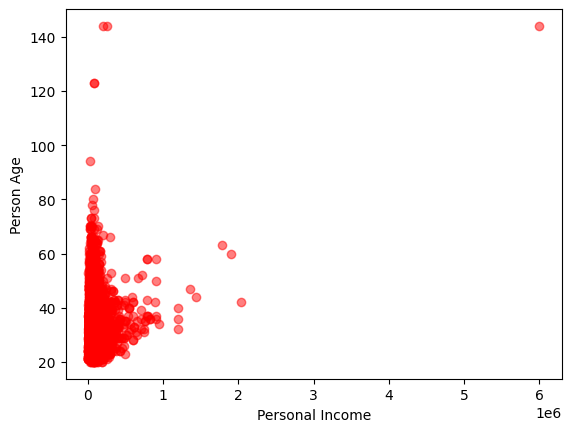

In [ ]:
# Plotear la Edad contra el Ingreso
plt.scatter(cr_loan['person_income'], cr_loan['person_age'], c='red', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()

##Revisemos como cada variable explica el default

##Categórica

In [ ]:
# Tabla cruzada de Destino y Y (loan status)
x=pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'])#, margins = True
x

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3722,1490
EDUCATION,5342,1111
HOMEIMPROVEMENT,2664,941
MEDICAL,4450,1621
PERSONAL,4423,1098
VENTURE,4872,847


In [ ]:
cr_loan['loan_status'].mean()

np.float64(0.21816396059052823)

In [ ]:
y=pd.DataFrame(cr_loan['loan_status'].groupby(cr_loan['loan_intent']).mean())
y.rename(columns={'loan_status':'bad_rate'},inplace=True)
y

,bad_rate
loan_intent,
DEBTCONSOLIDATION,0.285879
EDUCATION,0.172168
HOMEIMPROVEMENT,0.261026
MEDICAL,0.267007
PERSONAL,0.198877
VENTURE,0.148103


In [ ]:
pd.merge(x, y, how='inner', on='loan_intent')

,0,1,bad_rate
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,0.285879
EDUCATION,5342,1111,0.172168
HOMEIMPROVEMENT,2664,941,0.261026
MEDICAL,4450,1621,0.267007
PERSONAL,4423,1098,0.198877
VENTURE,4872,847,0.148103


##Cómo se verían los bad rates para las variables person_home_ownership y loan_grade?

In [ ]:
y=pd.DataFrame(cr_loan['loan_status'].groupby(cr_loan['person_home_ownership']).mean())
y.rename(columns={'loan_status':'bad_rate'},inplace=True)
y

,bad_rate
person_home_ownership,
MORTGAGE,0.125707
OTHER,0.308411
OWN,0.074690
RENT,0.315700


In [ ]:
y=pd.DataFrame(cr_loan['loan_status'].groupby(cr_loan['loan_grade']).mean())
y.rename(columns={'loan_status':'bad_rate'},inplace=True)
y

,bad_rate
loan_grade,
A,0.099564
B,0.162760
C,0.207340
D,0.590458
E,0.644191
F,0.705394
G,0.984375


##Numérica

In [ ]:
pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['loan_percent_income'], bins=[0,0.25,0.50,0.75,1])).mean())

##Cómo se verían los bad rates para person_age, person_emp_length y person_credit_hist_length

In [ ]:
W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['person_age'], bins=[0,25,50,75,100])).mean())
W.rename(columns={'loan_status':'bad_rate'})
W

/tmp/ipython-input-18-1375373451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['person_age'], bins=[0,25,50,75,100])).mean())


,loan_status
person_age,
"(0, 25]",0.230263
"(25, 50]",0.206599
"(50, 75]",0.262590
"(75, 100]",0.000000


In [ ]:
cr_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


In [ ]:
W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['person_emp_length'], bins=[0,2,4,7,123])).mean())
W.rename(columns={'loan_status':'bad_rate'})
W

/tmp/ipython-input-20-2578591001.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['person_emp_length'], bins=[0,2,4,7,123])).mean())


,loan_status
person_emp_length,
"(0, 2]",0.265080
"(2, 4]",0.206319
"(4, 7]",0.186988
"(7, 123]",0.167690


In [ ]:
W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['cb_person_cred_hist_length'], bins=[0,3,4,8,30])).mean())
W.rename(columns={'loan_status':'bad_rate'})
W

/tmp/ipython-input-21-3437677353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  W=pd.DataFrame(cr_loan['loan_status'].groupby(pd.cut(cr_loan['cb_person_cred_hist_length'], bins=[0,3,4,8,30])).mean())


,loan_status
cb_person_cred_hist_length,
"(0, 3]",0.229258
"(3, 4]",0.223122
"(4, 8]",0.206737
"(8, 30]",0.207715


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
A=KBinsDiscretizer(n_bins=5, encode='ordinal', strategy = 'quantile').fit_transform(cr_loan[['person_age']])
B=pd.DataFrame(A).rename(columns = {0: 'person_age_disc'})
cr_loan[['person_age_disc']]=B
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_age_disc
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,0.0
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,2.0
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,1.0
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1.0


In [ ]:
T=pd.DataFrame(cr_loan['loan_status'].groupby(cr_loan['person_age_disc']).mean())
T.rename(columns={'loan_status':'bad_rate'},inplace=True)
T

,bad_rate
person_age_disc,
0.0,0.257945
1.0,0.215380
2.0,0.216177
3.0,0.208431
4.0,0.205593


##Revisemos algunas interacciones

In [ ]:
# Tabla cruzada de tipo de vivienda, clasificación de riesgo y situación del préstamo
z=pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_grade'],
                  values=cr_loan['loan_status'], aggfunc='mean')
z

loan_grade,A,B,C,D,E,F,G
person_home_ownership,,,,,,,
MORTGAGE,0.043789,0.079941,0.142350,0.456647,0.474926,0.628866,1.000000
OTHER,0.115385,0.147059,0.352941,0.550000,0.750000,1.000000,NaN
OWN,0.071274,0.042289,0.062626,0.063830,0.543860,0.533333,1.000000
RENT,0.175177,0.240647,0.265782,0.737814,0.755357,0.779528,0.964286


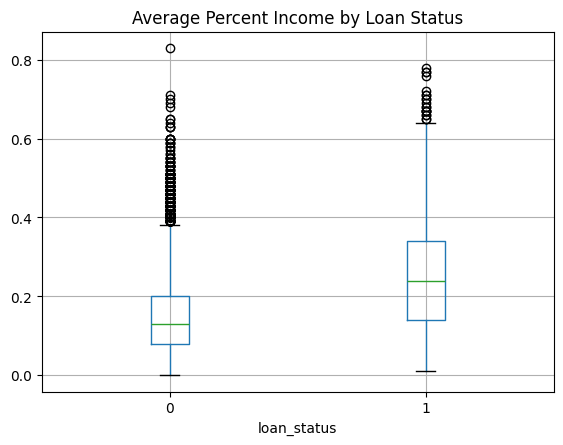

In [ ]:
# Gráfico de Cajas de porcentaje préstamo/ingreso por Situación del préstamo
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [ ]:
# Tabla cruzada de años de empleo (máximo) según situación del préstamo y tipo de vivienda
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],values=cr_loan['person_emp_length'], aggfunc='mean')

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,5.902120,3.945946,5.316986,3.939440
1,5.755828,3.090909,3.161677,3.649119
